In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/PSL-GAN-ad521b837aa1cabd3bbc6e72459104d0ca7cb72a/data.csv')
df.head(2000)

In [35]:
'''
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

import numpy
numpy.set_printoptions(threshold=sys.maxsize)
'''

In [2]:
df = df[~df['videoname'].astype(str).str.startswith('NNN')]
df

,videoname,axis,n_frame,n_landmark,coordinate
0,A-L-E-X_271,x,0,0,0.464181
1,A-L-E-X_271,x,0,1,0.487545
2,A-L-E-X_271,x,0,2,0.502058
3,A-L-E-X_271,x,0,3,0.515145
4,A-L-E-X_271,x,0,4,0.439742
...,...,...,...,...,...
318315,él_311,y,20,18,0.446793
318316,él_311,y,20,19,0.798213
318317,él_311,y,20,20,0.413768
318318,él_311,y,20,21,0.789132


In [3]:
df['class'] = df['videoname'].apply(lambda x: x.split('_')[0])

In [42]:
df

,videoname,axis,n_frame,n_landmark,coordinate,class
0,A-L-E-X_271,x,0,0,0.464181,A-L-E-X
1,A-L-E-X_271,x,0,1,0.487545,A-L-E-X
2,A-L-E-X_271,x,0,2,0.502058,A-L-E-X
3,A-L-E-X_271,x,0,3,0.515145,A-L-E-X
4,A-L-E-X_271,x,0,4,0.439742,A-L-E-X
...,...,...,...,...,...,...
318315,él_311,y,20,18,0.446793,él
318316,él_311,y,20,19,0.798213,él
318317,él_311,y,20,20,0.413768,él
318318,él_311,y,20,21,0.789132,él


In [45]:
x = df.groupby('videoname').agg({'coordinate':lambda x: list(x)})


In [47]:
x

,coordinate
videoname,
A-L-E-X_271,"[0.4641806781291961, 0.4875450730323791, 0.502..."
A-L-E-X_275,"[0.4197935163974762, 0.4364783763885498, 0.451..."
A-N-D-R-E-A_236,"[0.4292386472225189, 0.4564161002635956, 0.475..."
C A R B O H I D R A T O S_533,"[0.4890147745609283, 0.5065857768058777, 0.522..."
C A R B O H I D R A T O S_554,"[0.4957927763462066, 0.5187253355979919, 0.534..."
...,...
yo_125,"[0.4643368124961853, 0.4935872256755829, 0.511..."
yo_235,"[0.4391652941703796, 0.46458500623703, 0.48102..."
él_290,"[0.5183312296867371, 0.5406256914138794, 0.555..."


In [49]:
print(pd.unique(df['videoname']))

['A-L-E-X_271' 'A-L-E-X_275' 'A-N-D-R-E-A_236'
 'C A R B O H I D R A T O S_533' 'C A R B O H I D R A T O S_554'
 'C H U Ñ O_107' 'C H U Ñ O_225' 'M I N E R A L E S_398'
 'M I N E R A L E S_536' 'M-A-R-C-O_269' 'M-A-R-C-O_273'
 'P A T R I C I A_526' 'P A T R I C I A_615' 'P A T R I C I A_8'
 'P R O T E I N A S_543' 'P R O T E I N A_550' 'P-A-T-R-I-C-I-A_4'
 'P-U-B-E-R-T-A-D_52' 'PA T R I C I A_515' 'Perú_512' '_440' '___794'
 '____812' 'abuelo_255' 'aceptar_185' 'aceptar_66' 'acuerdo_112'
 'agrupar_353' 'agua_177' 'agua_537' 'ahora_243' 'ahora_246' 'ahora_64'
 'ahora_690' 'ahora_801' 'alegría_284' 'alimentos_693' 'alrededor_94'
 'amarrar_181' 'ambiente_203' 'ambiente_229' 'animal_671' 'animales_652'
 'animales_675' 'animales_702' 'antes_114' 'antes_248' 'antes_283'
 'antes_82' 'aprender_195' 'aprender_217' 'aprender_27' 'aprender_282'
 'aprender_35' 'aprender__466' 'aproximadamente_745' 'aproximado_707'
 'asco_293' 'atención_305' 'avanzar_160' 'ayudarme_574' 'ayudarte_808'
 'balancear_4

In [43]:
temp = pd.DataFrame(x['coordinate'].tolist())
temp

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
0,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.678018,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085
1,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.606166,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895
2,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.701851,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628
3,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.842139,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310
4,0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,0.530614,...,0.810638,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,0.502255,...,0.695857,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241
342,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.683784,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078
343,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.830198,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243
344,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.813259,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603


In [37]:
#classes = df["class"]
#dataset = temp.join(classes)

In [50]:
temp.insert(0,"instance",['A-L-E-X_271','A-L-E-X_275','A-N-D-R-E-A_236'
,'C,A,R,B,O,H,I,D,R,A,T,O,S_533','C,A,R,B,O,H,I,D,R,A,T,O,S_554'
,'C,H,U,Ñ,O_107','C,H,U,Ñ,O_225','M,I,N,E,R,A,L,E,S_398'
,'M,I,N,E,R,A,L,E,S_536','M-A-R-C-O_269','M-A-R-C-O_273'
,'P,A,T,R,I,C,I,A_526','P,A,T,R,I,C,I,A_615','P,A,T,R,I,C,I,A_8'
,'P,R,O,T,E,I,N,A,S_543','P,R,O,T,E,I,N,A_550','P-A-T-R-I-C-I-A_4'
,'P-U-B-E-R-T-A-D_52','PA,T,R,I,C,I,A_515','Perú_512','_440','___794'
,'____812','abuelo_255','aceptar_185','aceptar_66','acuerdo_112'
,'agrupar_353','agua_177','agua_537','ahora_243','ahora_246','ahora_64'
,'ahora_690','ahora_801','alegría_284','alimentos_693','alrededor_94'
,'amarrar_181','ambiente_203','ambiente_229','animal_671','animales_652'
,'animales_675','animales_702','antes_114','antes_248','antes_283'
,'antes_82','aprender_195','aprender_217','aprender_27','aprender_282'
,'aprender_35','aprender__466','aproximadamente_745','aproximado_707'
,'asco_293','atención_305','avanzar_160','ayudarme_574','ayudarte_808'
,'balancear_428','bien_241','bien_244','bien_278','bien_295','bien_39'
,'bien_401','bienvenida_5','botar_205','brotar,planta_137','brotar_117'
,'bueno_77','cada,uno_563','cada,uno_714','cada,uno_748','cambiar_108'
,'cambiar_140','cambiar_50','cantidad_447','carne_111','carne_423'
,'carne_683','casa_256','casa_29','cerdo_685','colores_798','comer_323'
,'comer_422','comer_437','comer_444','comer_590','comer_625','comer_644'
,'comer_709','comer_765','comida_539','conocer_83','contenta_238'
,'contento_516','continuar_26','continuar_356','controlar_176'
,'controlar_192','convivencia_245','crecer_120','crecer_136'
,'cuadricula_796','cuadrícula_811','cualquiera_34','cubrir_180'
,'cuerpo_476','cuerpo_597','cuerpo_599','cuerpo_605','cuerpo_67'
,'cuál_251','cuál_389','cuánto_405','cuánto_460','cuántos_443','cómo_44'
,'cómo_85','cómo_90','darte_375','decir_138','dejar,frasco_191'
,'dentro_596','depende_716','descubrir_14','destapar_183'
,'diariamente_402','diariamente_479','diariamente_785','diferentes_471'
,'diferentes_569','diferentes_668','diferentes_689','diferentes_750'
,'doce_59','dormir_268','dos_280','día_261','edad_718','ellos_754'
,'ellos_767','ellos_772','emoción_143','emoción_250','emoción_43'
,'emoción_54','emoción_71','empezar_32','enojar_124','enojar_276'
,'enojar_99','enojo_177','ensalada_436','entender_141','entonces_480'
,'escribir_56','escribir_797','ese_642','eso_110','este_63','explicar_42'
,'faltar_142','familia_204','familia_75','feliz_15','fluir_187'
,'frecuentemente_192','frijol_175','fuerte_310','fuerte_314','fuerte_363'
,'fuerte_487','fácil_341','gaseosa_331','gracias_233','grande_139'
,'grasa_396','grasa_534','gritar_122','guardar_87','guardar_97'
,'gustar_453','habitación_270','hacer_158','hermano_116','hermano_169'
,'hermanos_32','historia_212','hola_509','hola_513','hola_632','hoy_221'
,'hoy_540','huevo_679','importante_545','importante_629','impulsar_593'
,'incluir_394','informar_482','ingerir_546','inteligente_259'
,'interesante_113','ira_285','jugar_115','jugar_130','jugar_98'
,'juntos_36','juntos_618','listo_31','llamar_46','llamar_614','llorar_120'
,'luego_188','mamá_154','manera_85','mañana_2','menos_166','meter_178'
,'miedo_292','ministerio_11','mismos_182','mover_589','mundo_15'
,'más,o,menos_752','necesitar_474','niños_749','niños_776','no_108'
,'no_166','no_289','nombre_73','normal_198','objetivo_208','objetivo_220'
,'paciencia_153','papas,fritas_332','participar_637','pensar_406'
,'pensar_771','perder_127','perfecto_36','pero_442','pescado_684'
,'planta_119','planta_133','planta_159','planta_215','planta_435'
,'plantarse_135','pollo_686','porcentaje_491','porcentaje_495'
,'porción_421','positivo_199','preguntar_75','primaria_22','primaria_5'
,'primero_174','primo_104','primo_38','probar_254','problema_227'
,'proceso_170','proceso_351','propia_213','proteina_551','proteína_531'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_694'
,'proteínas_784','pubertad_48','querer_257','queso_354','quinto_773'
,'quinua_325','qué_573','qué_727','recordar_169','recordar_247'
,'regla_814','relación_161','sal_112','seco_222','seguir_13'
,'seleccionar_222','seleccionar_68','semana_180','semana_40','sentir_16'
,'sentir_187','sentir_591','sentir_602','sentir_604','sentir_89'
,'sexto_24','sexto_759','siguiente,1_206','siguiente_216','solo_663'
,'sorpresa_294','sí_242','sí_253','sí_277','sí_281','sí_76','sí_83'
,'también_114','también_124','tema_541','temperatura_109','tiempo_49'
,'tiempo_91','todo_320','todo_58','tristeza_291','tú_247','uno_260'
,'usar_214','ustedes_239','vaca_653','vaca_662','valor_764','venir_26'
,'venir_31','venir_617','venir_818','ver_49','verduras_673','vitamina_397'
,'vitaminas_328','vitaminas_366','vitaminas_535','volver_786','yo_125'
,'yo_235','él_290','él_295','él_311'],True)

In [51]:
temp

,instance,0,1,2,3,4,5,6,7,8,...,910,911,912,913,914,915,916,917,918,919
0,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.678018,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085
1,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.606166,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895
2,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.701851,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628
3,"C,A,R,B,O,H,I,D,R,A,T,O,S_533",0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.842139,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310
4,"C,A,R,B,O,H,I,D,R,A,T,O,S_554",0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,...,0.810638,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,yo_125,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,...,0.695857,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241
342,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.683784,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078
343,él_290,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,...,0.830198,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243
344,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.813259,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603


In [53]:
temp['class'] = temp['instance'].apply(lambda x: x.split('_')[0])

In [54]:
temp

,instance,0,1,2,3,4,5,6,7,8,...,911,912,913,914,915,916,917,918,919,class
0,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
1,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
2,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
3,"C,A,R,B,O,H,I,D,R,A,T,O,S_533",0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
4,"C,A,R,B,O,H,I,D,R,A,T,O,S_554",0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,...,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,yo_125,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,...,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241,yo
342,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
343,él_290,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
344,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [55]:
dataset = temp.iloc[ : ,1:923]

In [56]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,class
0,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
1,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
2,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
3,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
4,0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,0.530614,...,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,0.502255,...,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241,yo
342,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
343,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
344,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [60]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [61]:
X

array([[0.46418068, 0.48754507, 0.50205845, ..., 0.61788642, 0.46877483,
        0.60908526],
       [0.41979352, 0.43647838, 0.45126101, ..., 0.65484178, 0.3728528 ,
        0.64189488],
       [0.42923865, 0.4564161 , 0.47523952, ..., 0.67953998, 0.40995616,
        0.66662759],
       ...,
       [0.51833123, 0.54062569, 0.55522799, ..., 0.42468324, 0.81902939,
        0.44924268],
       [0.50071037, 0.52654034, 0.54319745, ..., 0.43887141, 0.82716894,
        0.45960298],
       [0.50100517, 0.52434278, 0.54087126, ..., 0.41376814, 0.78913236,
        0.44206053]])

In [62]:
y

array(['A-L-E-X', 'A-L-E-X', 'A-N-D-R-E-A', 'C,A,R,B,O,H,I,D,R,A,T,O,S',
       'C,A,R,B,O,H,I,D,R,A,T,O,S', 'C,H,U,Ñ,O', 'C,H,U,Ñ,O',
       'M,I,N,E,R,A,L,E,S', 'M,I,N,E,R,A,L,E,S', 'M-A-R-C-O', 'M-A-R-C-O',
       'P,A,T,R,I,C,I,A', 'P,A,T,R,I,C,I,A', 'P,A,T,R,I,C,I,A',
       'P,R,O,T,E,I,N,A,S', 'P,R,O,T,E,I,N,A', 'P-A-T-R-I-C-I-A',
       'P-U-B-E-R-T-A-D', 'PA,T,R,I,C,I,A', 'Perú', '', '', '', 'abuelo',
       'aceptar', 'aceptar', 'acuerdo', 'agrupar', 'agua', 'agua',
       'ahora', 'ahora', 'ahora', 'ahora', 'ahora', 'alegría',
       'alimentos', 'alrededor', 'amarrar', 'ambiente', 'ambiente',
       'animal', 'animales', 'animales', 'animales', 'antes', 'antes',
       'antes', 'antes', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aproximadamente', 'aproximado', 'asco',
       'atención', 'avanzar', 'ayudarme', 'ayudarte', 'balancear', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bienvenida', 'botar',
       'brotar,planta', 'br

In [63]:
Labelencoder_Y = LabelEncoder()
y= Labelencoder_Y.fit_transform(y)
y

array([  1,   1,   2,   3,   3,   4,   4,   5,   5,   6,   6,   7,   7,
         7,   9,   8,  10,  11,  12,  13,   0,   0,   0,  14,  15,  15,
        16,  17,  18,  18,  19,  19,  19,  19,  19,  20,  21,  22,  23,
        24,  24,  25,  26,  26,  26,  27,  27,  27,  27,  28,  28,  28,
        28,  28,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  37,
        37,  37,  37,  37,  38,  39,  41,  40,  42,  43,  43,  43,  44,
        44,  44,  45,  46,  46,  46,  47,  47,  48,  49,  50,  50,  50,
        50,  50,  50,  50,  50,  50,  51,  52,  53,  54,  55,  55,  56,
        56,  57,  58,  58,  59,  60,  61,  62,  63,  63,  63,  63,  63,
        64,  64,  65,  65,  66,  67,  67,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  75,  75,  76,  76,  76,  76,  76,  77,  78,  79,
        80,  81,  82,  82,  82,  83,  83,  83,  83,  83,  84,  85,  85,
        85,  86,  87,  88,  89,  90,  90,  91,  92,  93,  94,  95,  96,
        96,  97,  98,  99, 100, 101, 101, 101, 101, 102, 103, 10

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

([<matplotlib.axis.XTick at 0x27235ae33c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

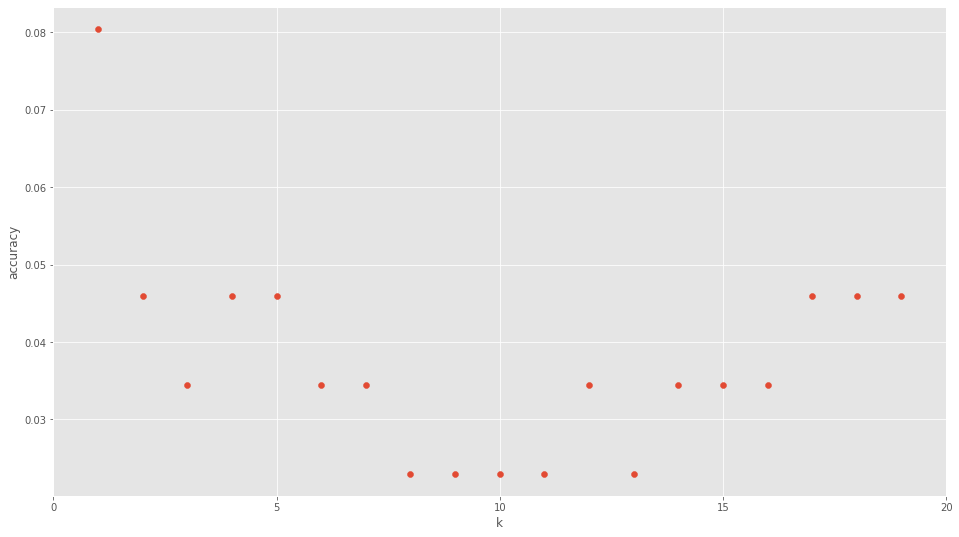

In [65]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [25]:
n_neighbors = 2
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [18]:
import pandas as pd
#pd.set_option('display.max_rows', 11500)
#pd.set_option('display.max_columns', 11500)
#pd.set_option('display.width', 111000)
#pd.set_option('display.expand_frame_repr', False)

# Environment settings: 
'''
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
'''
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

#pd.options.display.max_rows = 999

pred = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)

[[87]]


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (56).

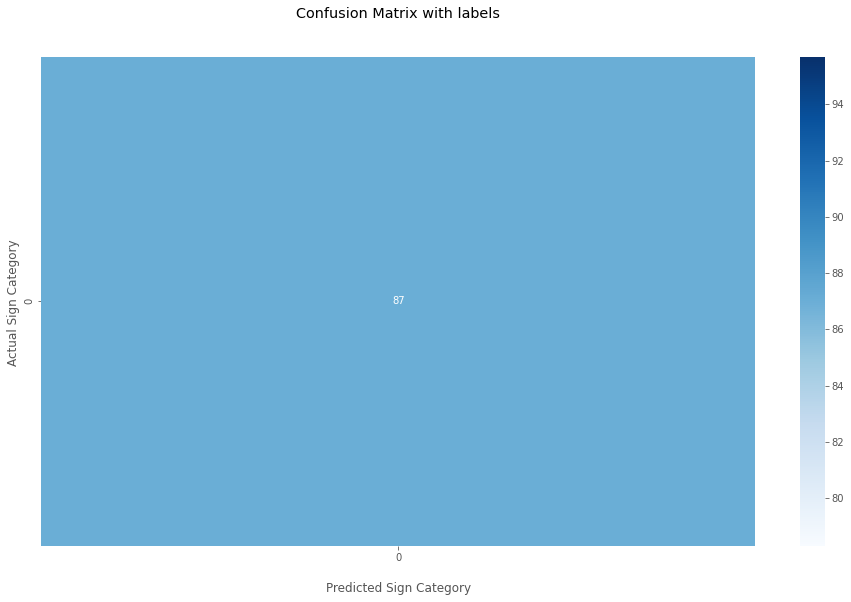

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sign Category')
ax.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

'''
temp1 = ax.xaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp1.array()


temp2 = ax.yaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp2.shape
'''
## Display the visualization of the Confusion Matrix.
plt.show()

# Tokenization

In [ ]:
# Perform standard imports:
import es_core_news_sm #español
import spacy
nlp = es_core_news_sm.load()
doc1 = nlp(u"ellos venir ya ese continuar recordar sentir aprender abuelo ver todo diferentes no decir antes escribir familia poder bien qué sí él ahora dentro quinto frijol proteínas cómo enojar hola cuánto también casa carne fácil pensar mamá yo pero juntos tú planta mal aquí cuerpo fuerte grasa hoy niños emoción hermano controlar sexto agua comer hacer")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

verbs = [ 'venir' , 'continuar' , 'recordar','sentir','aprender', 'ver','decir','escribir', 'enojar', 'pensar', 'controlar', 'comer', 'hacer']

In [ ]:
#verbs = dataframe .loc[dataframe['class'] == 'venir',  'continuar', 'recordar','sentir','aprender', 'ver','decir','escribir', 'enojar', 'pensar', 'controlar', 'comer', 'hacer']
#print (verbs)

verbs = dataframe.loc[(dataframe['class'] == 'venir') | (dataframe['class'] == 'continuar')  |  (dataframe['class'] == 'recordar') | (dataframe['class'] == 'sentir') | 
(dataframe['class'] == 'aprender') | (dataframe['class'] == 'ver') | (dataframe['class'] == 'decir') | (dataframe['class'] == 'escribir') | (dataframe['class'] == 'enojar') |
 (dataframe['class'] == 'pensar') | (dataframe['class'] == 'controlar') | (dataframe['class'] == 'comer') | (dataframe['class'] == 'hacer')

]
print (verbs)
#verbs = dataframe.loc(axis=0)[:, :, 'C1', :]  
#print (verbs)

In [ ]:
X_verbs = verbs.iloc[:,:-1].values
y_verbs = verbs.iloc[:,-1].values

In [ ]:

X_train_verbs, X_test_verbs, y_train_verbs, y_test_verbs = train_test_split(X_verbs, y_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_verbs = scaler.fit_transform(X_train_verbs)
X_test_verbs = scaler.transform(X_test_verbs)

k_range_verbs = range(1, 20)
scores_verbs = []
for k in k_range_verbs:
    knn_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_verbs.fit(X_train_verbs, y_train_verbs)
    scores_verbs.append(knn_verbs.score(X_test_verbs, y_test_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_verbs, scores_verbs)
plt.xticks([0,5,10,15,20])


In [ ]:
n_neighbors_verbs = 4
 
knn_verbs = KNeighborsClassifier(n_neighbors_verbs)
knn_verbs.fit(X_train_verbs, y_train_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_verbs.score(X_train_verbs, y_train_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_verbs.score(X_test_verbs, y_test_verbs)))
	 
	 
pred_verbs = knn_verbs.predict(X_test_verbs)
print(confusion_matrix(y_test_verbs, pred_verbs))